<a href="https://colab.research.google.com/github/Tirta2241720045/PCVK_Ganjil_2024/blob/main/PBL/Image_Preprocessing(dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please upload an image file:


Saving 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG to 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG


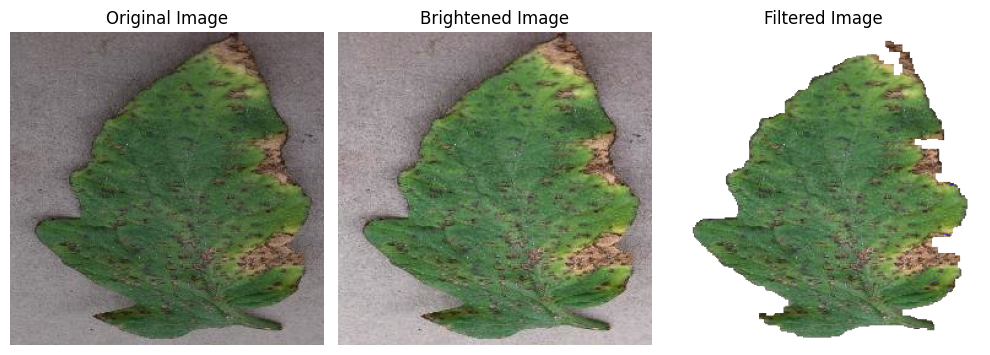

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

def increase_brightness(image, brightness_factor=1.3):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    hsv_image[..., 2] = hsv_image[..., 2] * brightness_factor
    hsv_image[..., 2] = np.clip(hsv_image[..., 2], 0, 255)
    brightened_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return brightened_image

def filter_colors(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    green_lower = np.array([35, 40, 40])
    green_upper = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, yellow_lower, yellow_upper)

    brown_lower = np.array([10, 100, 50])
    brown_upper = np.array([30, 255, 150])
    brown_mask = cv2.inRange(hsv_image, brown_lower, brown_upper)

    combined_mask = cv2.bitwise_or(green_mask, yellow_mask)
    combined_mask = cv2.bitwise_or(combined_mask, brown_mask)

    kernel = np.ones((5, 5), np.uint8)
    expanded_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
    expanded_mask = cv2.morphologyEx(expanded_mask, cv2.MORPH_OPEN, kernel)

    contours, _ = cv2.findContours(
        expanded_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )

    final_mask = np.zeros_like(combined_mask)
    for contour in contours:
        area = cv2.contourArea(contour)
        if area > 100:
            cv2.drawContours(final_mask, [contour], 0, 255, -1)

    filtered_image = cv2.bitwise_and(image, image, mask=final_mask)

    white_background = np.ones_like(image, dtype=np.uint8) * 255
    final_image = np.where(filtered_image == 0, white_background, filtered_image)

    return final_image

# Function to upload image in Google Colab
def upload_image_colab():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name)
        return image
    else:
        print("No file uploaded.")
        return None

# Main workflow
if __name__ == "__main__":
    # Upload an image
    print("Please upload an image file:")
    input_image = upload_image_colab()

    if input_image is not None:
        # Convert to RGB (OpenCV loads images in BGR format)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        # Preprocessing
        brightened_image = increase_brightness(input_image)
        filtered_image = filter_colors(brightened_image)

        # Display input and output images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(input_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(brightened_image)
        plt.title("Brightened Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(filtered_image)
        plt.title("Filtered Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Image upload failed.")


Please upload an image file:


Saving 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG to 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204 (10).JPG


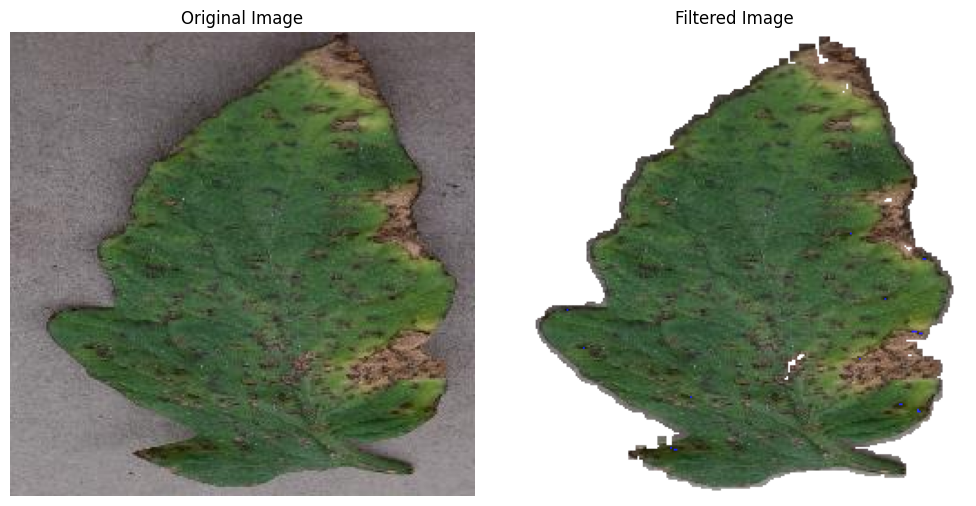

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

def remove_grayscale_except_adjacent(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Define color ranges for adjacent colors (yellow, brown, orange, green, cream)
    yellow_lower = np.array([20, 100, 100])
    yellow_upper = np.array([30, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, yellow_lower, yellow_upper)

    brown_lower = np.array([10, 100, 50])
    brown_upper = np.array([30, 255, 150])
    brown_mask = cv2.inRange(hsv_image, brown_lower, brown_upper)

    orange_lower = np.array([10, 150, 150])
    orange_upper = np.array([25, 255, 255])
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)

    green_lower = np.array([35, 40, 40])
    green_upper = np.array([85, 255, 255])
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    cream_lower = np.array([15, 40, 180])
    cream_upper = np.array([25, 100, 255])
    cream_mask = cv2.inRange(hsv_image, cream_lower, cream_upper)

    # Combine masks
    combined_mask = cv2.bitwise_or(yellow_mask, brown_mask)
    combined_mask = cv2.bitwise_or(combined_mask, orange_mask)
    combined_mask = cv2.bitwise_or(combined_mask, green_mask)
    combined_mask = cv2.bitwise_or(combined_mask, cream_mask)

    # Remove grayscale regions unless adjacent to these colors
    kernel = np.ones((5, 5), np.uint8)
    expanded_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_DILATE, kernel)

    # Create final mask to preserve adjacent regions and remove others
    final_mask = cv2.inRange(hsv_image, np.array([0, 0, 0]), np.array([180, 255, 255]))
    final_mask = cv2.bitwise_and(final_mask, expanded_mask)

    filtered_image = cv2.bitwise_and(image, image, mask=final_mask)

    white_background = np.ones_like(image, dtype=np.uint8) * 255
    final_image = np.where(filtered_image == 0, white_background, filtered_image)

    return final_image

# Function to upload image in Google Colab
def upload_image_colab():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name)
        return image
    else:
        print("No file uploaded.")
        return None

# Main workflow
if __name__ == "__main__":
    # Upload an image
    print("Please upload an image file:")
    input_image = upload_image_colab()

    if input_image is not None:
        # Convert to RGB (OpenCV loads images in BGR format)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        # Preprocessing
        filtered_image = remove_grayscale_except_adjacent(input_image)

        # Display input and output images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image)
        plt.title("Filtered Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Image upload failed.")


Please upload an image file:


Saving 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG to 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204 (12).JPG


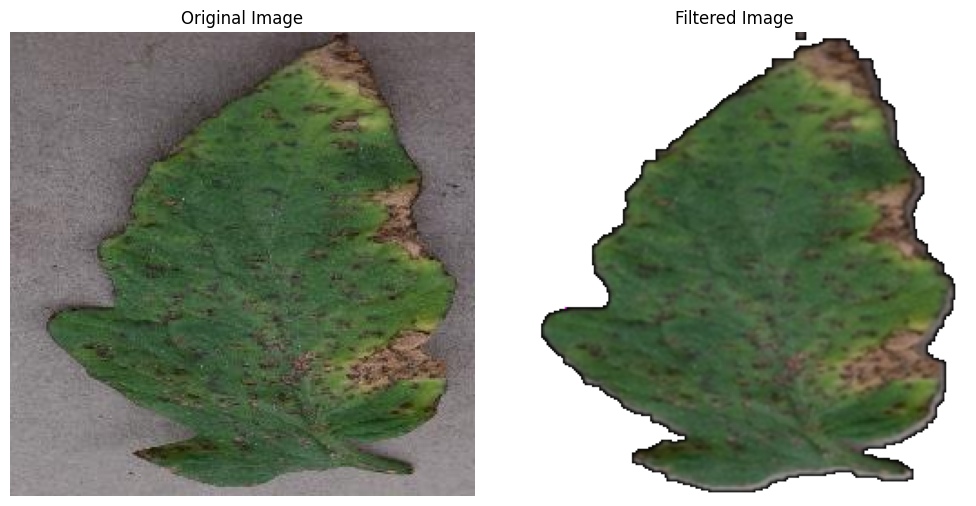

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

def remove_grayscale_except_adjacent(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Refined color ranges for better detection
    yellow_lower = np.array([15, 70, 70])
    yellow_upper = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, yellow_lower, yellow_upper)

    brown_lower = np.array([5, 40, 40])
    brown_upper = np.array([25, 200, 150])
    brown_mask = cv2.inRange(hsv_image, brown_lower, brown_upper)

    orange_lower = np.array([10, 80, 80])
    orange_upper = np.array([30, 255, 255])
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)

    green_lower = np.array([30, 20, 20])
    green_upper = np.array([90, 255, 255])
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    cream_lower = np.array([15, 20, 150])
    cream_upper = np.array([35, 120, 255])
    cream_mask = cv2.inRange(hsv_image, cream_lower, cream_upper)

    # Combine masks for selected colors
    combined_mask = cv2.bitwise_or(yellow_mask, brown_mask)
    combined_mask = cv2.bitwise_or(combined_mask, orange_mask)
    combined_mask = cv2.bitwise_or(combined_mask, green_mask)
    combined_mask = cv2.bitwise_or(combined_mask, cream_mask)

    # Use morphology with adaptive kernel size
    kernel = np.ones((4, 4), np.uint8)
    expanded_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
    expanded_mask = cv2.morphologyEx(expanded_mask, cv2.MORPH_OPEN, kernel)

    # Apply the mask to the original image
    filtered_image = cv2.bitwise_and(image, image, mask=expanded_mask)

    # Ensure smoother edges with GaussianBlur
    filtered_image = cv2.GaussianBlur(filtered_image, (3, 3), 0)

    white_background = np.ones_like(image, dtype=np.uint8) * 255
    final_image = np.where(filtered_image == 0, white_background, filtered_image)

    return final_image

# Function to upload image in Google Colab
def upload_image_colab():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name)
        return image
    else:
        print("No file uploaded.")
        return None

# Main workflow
if __name__ == "__main__":
    # Upload an image
    print("Please upload an image file:")
    input_image = upload_image_colab()

    if input_image is not None:
        # Convert to RGB (OpenCV loads images in BGR format)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        # Preprocessing
        filtered_image = remove_grayscale_except_adjacent(input_image)

        # Display input and output images
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(input_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(filtered_image)
        plt.title("Filtered Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Image upload failed.")

Please upload an image file:


Saving 40860ca0-2ec2-43be-817d-ef19ae1c10af___GCREC_Bact.Sp 6097.JPG to 40860ca0-2ec2-43be-817d-ef19ae1c10af___GCREC_Bact.Sp 6097.JPG


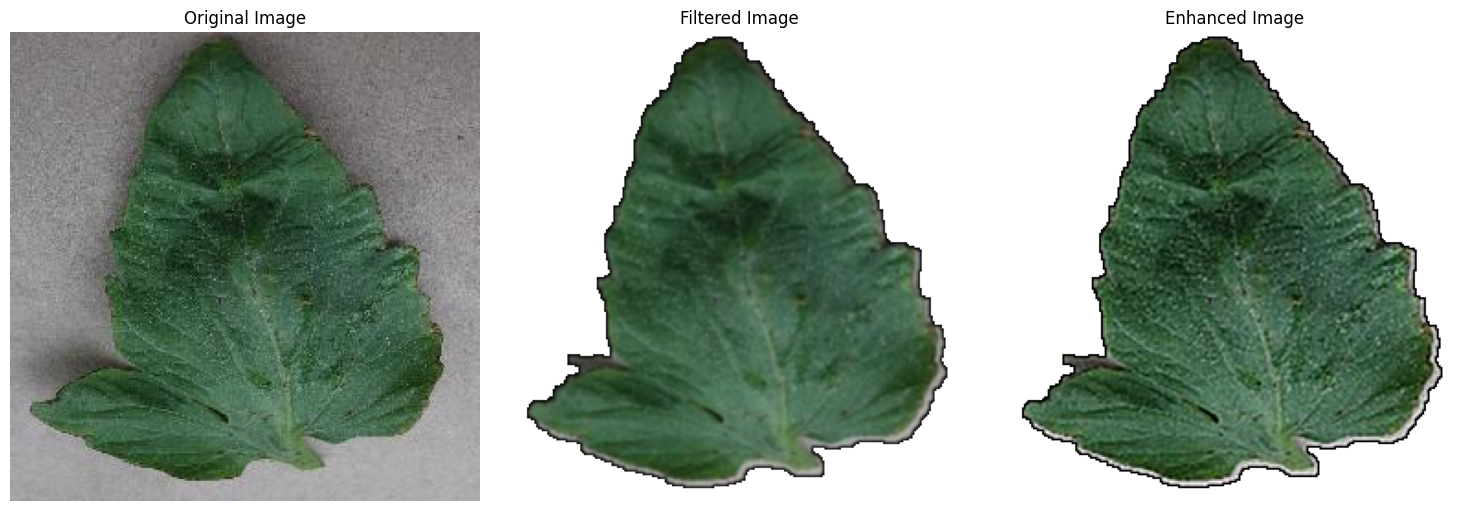

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

def remove_grayscale_except_adjacent(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Refined color ranges for better detection
    yellow_lower = np.array([15, 70, 70])
    yellow_upper = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, yellow_lower, yellow_upper)

    brown_lower = np.array([5, 40, 40])
    brown_upper = np.array([25, 200, 150])
    brown_mask = cv2.inRange(hsv_image, brown_lower, brown_upper)

    orange_lower = np.array([10, 80, 80])
    orange_upper = np.array([30, 255, 255])
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)

    green_lower = np.array([30, 20, 20])
    green_upper = np.array([90, 255, 255])
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    cream_lower = np.array([15, 20, 150])
    cream_upper = np.array([35, 120, 255])
    cream_mask = cv2.inRange(hsv_image, cream_lower, cream_upper)

    # Combine masks for selected colors
    combined_mask = cv2.bitwise_or(yellow_mask, brown_mask)
    combined_mask = cv2.bitwise_or(combined_mask, orange_mask)
    combined_mask = cv2.bitwise_or(combined_mask, green_mask)
    combined_mask = cv2.bitwise_or(combined_mask, cream_mask)

    # Use morphology with adaptive kernel size
    kernel = np.ones((4, 4), np.uint8)
    expanded_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
    expanded_mask = cv2.morphologyEx(expanded_mask, cv2.MORPH_OPEN, kernel)

    # Apply the mask to the original image
    filtered_image = cv2.bitwise_and(image, image, mask=expanded_mask)

    # Ensure smoother edges with GaussianBlur
    filtered_image = cv2.GaussianBlur(filtered_image, (3, 3), 0)

    white_background = np.ones_like(image, dtype=np.uint8) * 255
    final_image = np.where(filtered_image == 0, white_background, filtered_image)

    return final_image

def enhance_sharpness(image):
    # Apply sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Function to upload image in Google Colab
def upload_image_colab():
    uploaded = files.upload()
    if uploaded:
        file_name = next(iter(uploaded))
        image = cv2.imread(file_name)
        return image
    else:
        print("No file uploaded.")
        return None

# Main workflow
if __name__ == "__main__":
    # Upload an image
    print("Please upload an image file:")
    input_image = upload_image_colab()

    if input_image is not None:
        # Convert to RGB (OpenCV loads images in BGR format)
        input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

        # Preprocessing
        filtered_image = remove_grayscale_except_adjacent(input_image)

        # Enhance sharpness
        enhanced_image = enhance_sharpness(filtered_image)

        # Display input and output images
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(input_image)
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(1, 3, 2)
        plt.imshow(filtered_image)
        plt.title("Filtered Image")
        plt.axis("off")

        plt.subplot(1, 3, 3)
        plt.imshow(enhanced_image)
        plt.title("Enhanced Image")
        plt.axis("off")

        plt.tight_layout()
        plt.show()
    else:
        print("Image upload failed.")

In [18]:
import cv2
import numpy as np
import os
from google.colab import files

def remove_grayscale_except_adjacent(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Refined color ranges for better detection
    yellow_lower = np.array([15, 70, 70])
    yellow_upper = np.array([40, 255, 255])
    yellow_mask = cv2.inRange(hsv_image, yellow_lower, yellow_upper)

    brown_lower = np.array([5, 40, 40])
    brown_upper = np.array([25, 200, 150])
    brown_mask = cv2.inRange(hsv_image, brown_lower, brown_upper)

    orange_lower = np.array([10, 80, 80])
    orange_upper = np.array([30, 255, 255])
    orange_mask = cv2.inRange(hsv_image, orange_lower, orange_upper)

    green_lower = np.array([30, 20, 20])
    green_upper = np.array([90, 255, 255])
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    cream_lower = np.array([15, 20, 150])
    cream_upper = np.array([35, 120, 255])
    cream_mask = cv2.inRange(hsv_image, cream_lower, cream_upper)

    # Combine masks for selected colors
    combined_mask = cv2.bitwise_or(yellow_mask, brown_mask)
    combined_mask = cv2.bitwise_or(combined_mask, orange_mask)
    combined_mask = cv2.bitwise_or(combined_mask, green_mask)
    combined_mask = cv2.bitwise_or(combined_mask, cream_mask)

    # Use morphology with adaptive kernel size
    kernel = np.ones((4, 4), np.uint8)
    expanded_mask = cv2.morphologyEx(combined_mask, cv2.MORPH_CLOSE, kernel)
    expanded_mask = cv2.morphologyEx(expanded_mask, cv2.MORPH_OPEN, kernel)

    # Apply the mask to the original image
    filtered_image = cv2.bitwise_and(image, image, mask=expanded_mask)

    # Ensure smoother edges with GaussianBlur
    filtered_image = cv2.GaussianBlur(filtered_image, (3, 3), 0)

    white_background = np.ones_like(image, dtype=np.uint8) * 255
    final_image = np.where(filtered_image == 0, white_background, filtered_image)

    return final_image

def enhance_sharpness(image):
    # Apply sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def upload_folder():
    print("Please upload a folder containing images:")
    uploaded = files.upload()
    if uploaded:
        folder_path = "/content/uploaded_folder"
        os.makedirs(folder_path, exist_ok=True)
        for file_name in uploaded:
            file_path = os.path.join(folder_path, file_name)
            with open(file_path, "wb") as f:
                f.write(uploaded[file_name])
        return folder_path
    else:
        print("No folder uploaded.")
        return None

def process_and_save_images(input_folder, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    for file_name in os.listdir(input_folder):
        input_path = os.path.join(input_folder, file_name)
        if not os.path.isfile(input_path):
            continue

        image = cv2.imread(input_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Preprocessing
        filtered_image = remove_grayscale_except_adjacent(image)
        enhanced_image = enhance_sharpness(filtered_image)

        # Save the processed image
        output_path = os.path.join(output_folder, file_name)
        enhanced_image_bgr = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2BGR)
        cv2.imwrite(output_path, enhanced_image_bgr)
        print(f"Processed and saved: {output_path}")

# Main workflow
if __name__ == "__main__":
    input_folder = upload_folder()
    if input_folder:
        output_folder = "/content/sample_data/dataset/Bacterial_spot"
        process_and_save_images(input_folder, output_folder)
        print(f"All images have been processed and saved to {output_folder}.")
    else:
        print("Folder upload failed.")


Please upload a folder containing images:


Saving 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204.JPG to 35797a1e-c933-4ae3-817f-abc07775075d___GCREC_Bact.Sp 3204 (14).JPG
Saving 37592d17-06d6-492a-a469-3726396ad71b___GCREC_Bact.Sp 5560.JPG to 37592d17-06d6-492a-a469-3726396ad71b___GCREC_Bact.Sp 5560.JPG
Saving 39585b95-2167-4dac-9993-f75aac8d38bc___GCREC_Bact.Sp 3538.JPG to 39585b95-2167-4dac-9993-f75aac8d38bc___GCREC_Bact.Sp 3538.JPG
Saving 40688c11-791b-465a-9476-a5069e24a56f___GCREC_Bact.Sp 3064.JPG to 40688c11-791b-465a-9476-a5069e24a56f___GCREC_Bact.Sp 3064.JPG
Saving 40860ca0-2ec2-43be-817d-ef19ae1c10af___GCREC_Bact.Sp 6097.JPG to 40860ca0-2ec2-43be-817d-ef19ae1c10af___GCREC_Bact.Sp 6097 (1).JPG
Saving 41128d1d-2a43-4c08-a100-c92c2fc8b9b0___GCREC_Bact.Sp 3413.JPG to 41128d1d-2a43-4c08-a100-c92c2fc8b9b0___GCREC_Bact.Sp 3413.JPG
Saving 41166a90-b9b6-4694-9a4b-81fffd3c4ca9___GCREC_Bact.Sp 5889.JPG to 41166a90-b9b6-4694-9a4b-81fffd3c4ca9___GCREC_Bact.Sp 5889.JPG
Saving 46520eb0-dbd0-40c7-ba4f-37510a15af9e___GCREC_B